# Saeb 2021 - 5º ano Ensino Fundamental

Os microdados do Saeb podem ser encontrados aqui: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/saeb ou https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/saeb/resultados

**Análises:**
1) Distribuição de estudantes de 5º ano EF por declaração de cor/ raça e por proficiência em Língua Portuguesa e Matemática.

In [48]:
# Importando as bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Distribuição de estudantes de 5º ano EF por declaração de cor/ raça e por proficiência em Língua Portuguesa e Matemática:

## 5º ano do Ensino Fundamental:

Segundo o dicionário dos dados, a variável 'TX_RESP_Q04' (Qual é sua cor ou raça?) pode apresentar 8 valores distintos:
- *: Nulo;
- .: Resposta em branco;
- A: Branca;
- B: Preta;
- C: Parda;
- D: Amarela;
- E: Indígena;
- F: Não quero declarar.

Vamos utilizar dados do Saeb de 2021.

In [49]:
# Carregar os dados do Saeb 2021 em csv:
saeb2021_5EF = pd.read_csv(r"C:\Users\hugob\OneDrive\Desktop\microdados_saeb_2021_ensino_fundamental_e_medio\DADOS\TS_ALUNO_5EF.csv", sep=';')

In [50]:
saeb2021_5EF

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,IN_PUBLICA,ID_LOCALIZACAO,ID_TURMA,ID_SERIE,...,TX_RESP_Q20e,TX_RESP_Q21a,TX_RESP_Q21b,TX_RESP_Q21c,TX_RESP_Q21d,TX_RESP_Q21e,TX_RESP_Q21f,TX_RESP_Q21g,TX_RESP_Q21h,TX_RESP_Q21i
0,2021,1,11,6316600,2,61324549,1,1,1324376,5,...,D,D,D,D,D,D,D,D,D,D
1,2021,1,11,6316600,2,61324549,1,1,1324376,5,...,.,.,.,.,.,.,.,.,.,.
2,2021,1,11,6316600,2,61324549,1,1,1324376,5,...,.,.,.,.,.,.,.,.,.,.
3,2021,1,11,6316600,2,61324549,1,1,1324376,5,...,B,*,C,B,C,*,C,C,D,C
4,2021,1,11,6316600,2,61324549,1,1,1324376,5,...,C,C,D,A,D,C,B,C,D,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554179,2021,5,53,6322169,1,61397111,0,1,1340038,5,...,C,D,D,D,C,C,D,D,D,D
2554180,2021,5,53,6322169,1,61397111,0,1,1340038,5,...,D,D,B,.,C,D,C,D,D,C
2554181,2021,5,53,6322169,1,61397111,0,1,1340038,5,...,B,D,D,D,A,D,C,D,D,A
2554182,2021,5,53,6322169,1,61397111,0,1,1340038,5,...,D,A,D,A,A,C,D,D,C,A


In [51]:
# Contagem de participantes em cada categoria:
contagem = saeb2021_5EF['TX_RESP_Q04'].value_counts()

contagem

TX_RESP_Q04
C    790672
.    643209
A    587619
B    237299
F    194763
D     52122
E     34515
*     13985
Name: count, dtype: int64

As proficiências são calculadas de acordo com a escala Saeb. 
Uma considera a média como 0 e desvio padrão 1. A outra considera a média 250 e desvio padrão 50. Sendo assim, caso a média das categorias estejam abaixo de 0 ou de 250, isso significa que elas estão abaixo do que seria a média da escala Saeb.

Para mais informações sobre a escala de proficiência Saeb, acesse: https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/saeb/matrizes-e-escalas

In [52]:
# Calcula a média, agrupando por Raça/Cor:
LP_media = saeb2021_5EF.groupby('TX_RESP_Q04')['PROFICIENCIA_LP'].mean()
LP_saeb_media = saeb2021_5EF.groupby('TX_RESP_Q04')['PROFICIENCIA_LP_SAEB'].mean()
MT_media = saeb2021_5EF.groupby('TX_RESP_Q04')['PROFICIENCIA_MT'].mean()
MT_saeb_media = saeb2021_5EF.groupby('TX_RESP_Q04')['PROFICIENCIA_MT_SAEB'].mean()

In [53]:
# Concatenar as Series em um único DataFrame:
saeb2021_5EF_proficiencia = pd.concat([contagem, LP_media, LP_saeb_media, MT_media, MT_saeb_media], axis=1)

# Remover a coluna do índice:
saeb2021_5EF_proficiencia = saeb2021_5EF_proficiencia.reset_index()

In [54]:
# Renomear a coluna:
saeb2021_5EF_proficiencia.columns = ['COR ou RACA', 'Contagem', 'PROFICIENCIA_LP', 'PROFICIENCIA_LP_SAEB', 'PROFICIENCIA_MT', 'PROFICIENCIA_MT_SAEB']

# Substituir os valores de 'COR ou RACA':
# Dicionário de mapeamento de valores a serem substituídos:
substituicoes_cor_raca = {'*': 'Nulo',
                          '.': 'Resposta em branco',
                          'A': 'Branca',
                          'B': 'Preta',
                          'C': 'Parda',
                          'D': 'Amarela',
                          'E': 'Indígena',
                          'F': 'Não quero declarar'}

# Substituir os valores na coluna específica usando o dicionário:
saeb2021_5EF_proficiencia['COR ou RACA'] = saeb2021_5EF_proficiencia['COR ou RACA'].replace(substituicoes_cor_raca)

In [55]:
# Reduzir para 2 casas decimais:
saeb2021_5EF_proficiencia = saeb2021_5EF_proficiencia.round(2)

In [56]:
saeb2021_5EF_proficiencia

,COR ou RACA,Contagem,PROFICIENCIA_LP,PROFICIENCIA_LP_SAEB,PROFICIENCIA_MT,PROFICIENCIA_MT_SAEB
0,Parda,790672,-0.80,206.10,-0.65,213.88
1,Resposta em branco,643209,-1.24,181.52,-1.04,192.03
2,Branca,587619,-0.69,211.76,-0.53,220.31
3,Preta,237299,-1.18,184.74,-0.98,194.92
4,Não quero declarar,194763,-0.96,196.99,-0.76,207.59
5,Amarela,52122,-1.18,185.21,-0.95,196.88
6,Indígena,34515,-0.94,198.18,-0.79,205.76
7,Nulo,13985,-1.24,181.87,-1.01,193.34


#### Visualizações:

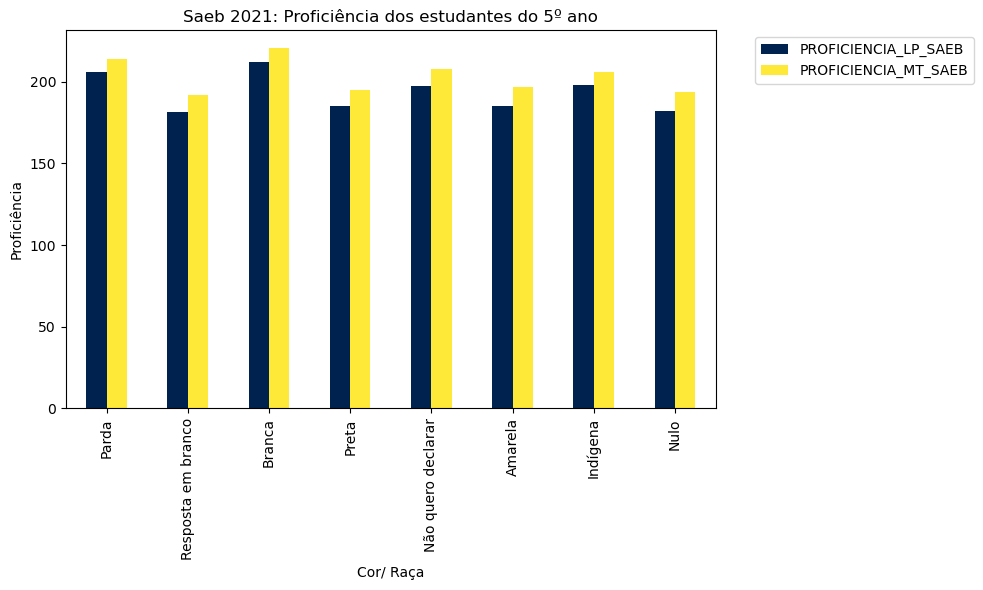

In [57]:
# Selecionar as variáveis específicas do DataFrame:
colunas_selecionadas = ['PROFICIENCIA_LP_SAEB', 'PROFICIENCIA_MT_SAEB']

# Criar o gráfico de barras verticais
saeb2021_5EF_proficiencia.set_index('COR ou RACA')[colunas_selecionadas].plot(kind='bar', colormap='cividis', stacked=False, figsize=(10, 6))

# Adicionar rótulos aos eixos
plt.xlabel('Cor/ Raça')
plt.ylabel('Proficiência')
plt.title('Saeb 2021: Proficiência dos estudantes do 5º ano')

# Mover a legenda para fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Salvar imagem:
plt.savefig('Saeb 2021_Proficiencia 5EF.png')

# Exibir o gráfico
plt.show()

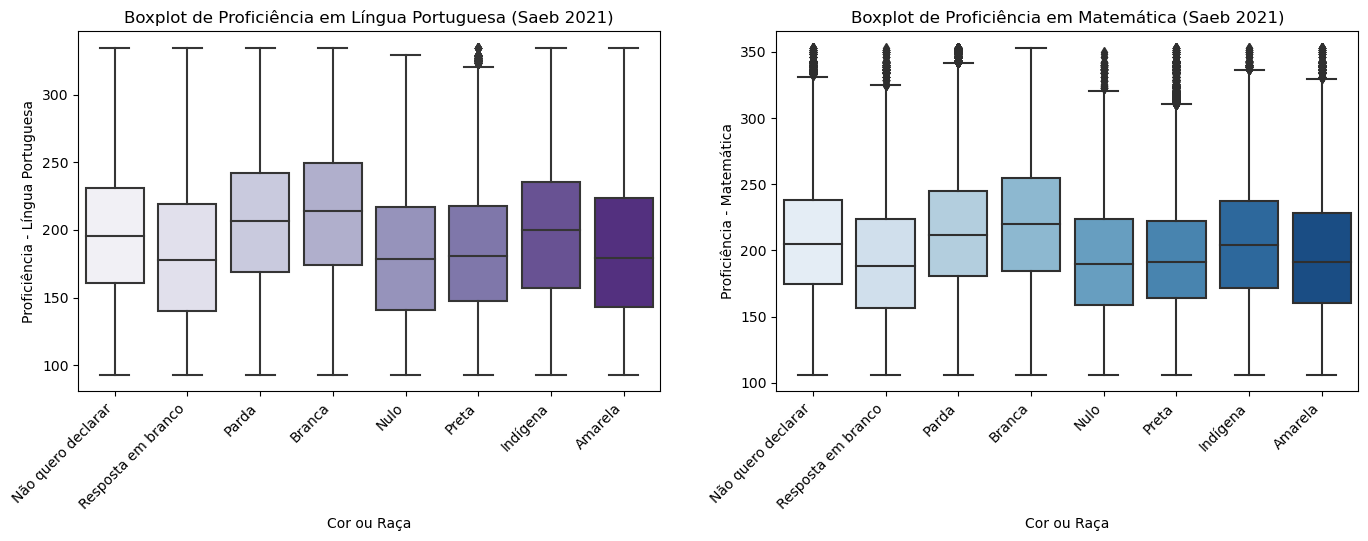

In [67]:
# BOXPLOT:
# Crie a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot para PROFICIENCIA_LP_SAEB
sns.boxplot(x='TX_RESP_Q04', y='PROFICIENCIA_LP_SAEB', data=saeb2021_5EF, ax=axes[0], palette="Purples")
axes[0].set_title('Boxplot de Proficiência em Língua Portuguesa (Saeb 2021)')
axes[0].set_xlabel('Cor ou Raça')
axes[0].set_ylabel('Proficiência - Língua Portuguesa')

# Modificar rótulos manualmente
axes[0].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Boxplot para PROFICIENCIA_MT_SAEB
sns.boxplot(x='TX_RESP_Q04', y='PROFICIENCIA_MT_SAEB', data=saeb2021_5EF, ax=axes[1], palette="Blues")
axes[1].set_title('Boxplot de Proficiência em Matemática (Saeb 2021)')
axes[1].set_xlabel('Cor ou Raça')
axes[1].set_ylabel('Proficiência - Matemática')

# Modificar rótulos manualmente
axes[1].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Ajuste as margens para garantir que toda a figura seja incluída
plt.subplots_adjust(bottom=0.3, top=0.9, left=0.1, right=0.9)

# Salvar imagem:
plt.savefig('Saeb 2021_Boxplot proficiencia 5EF.png')

# Exibe o gráfico
plt.show()

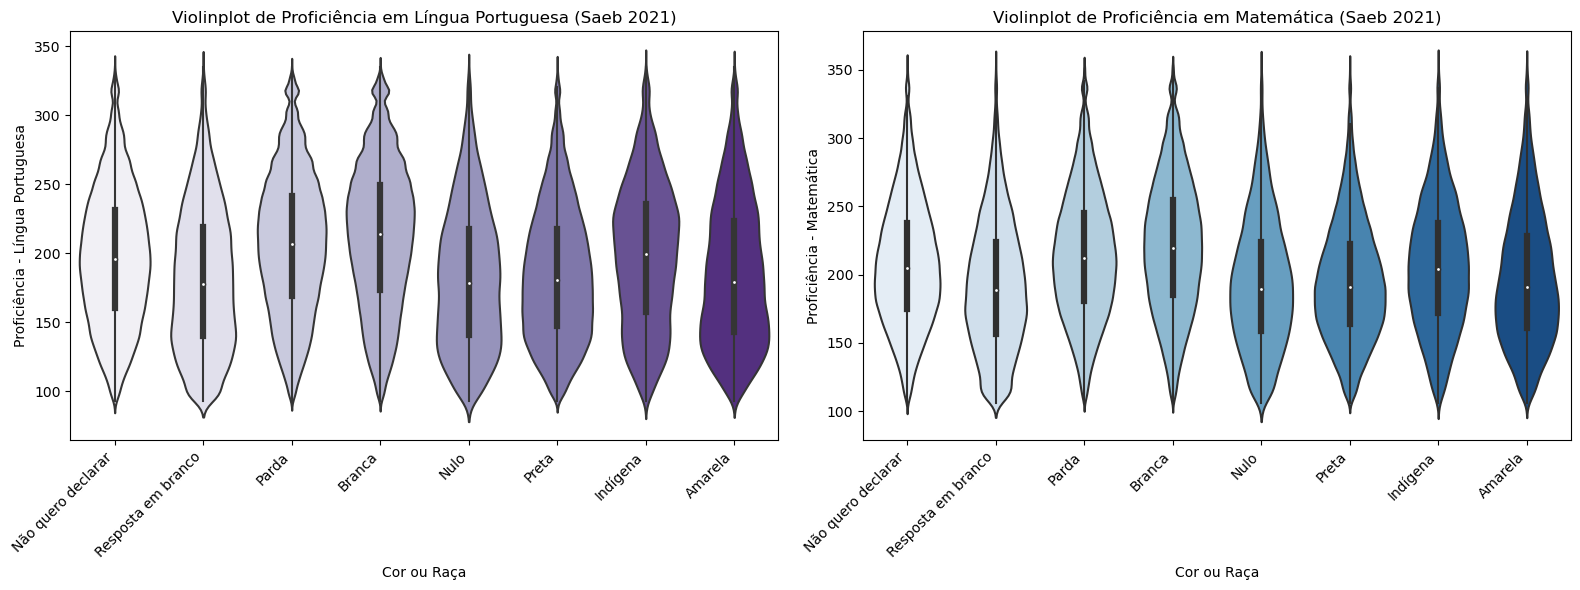

In [47]:
# GRÁFICO DE VIOLINO:
# Crie a figura e os eixos para os subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot para PROFICIENCIA_LP_SAEB
sns.violinplot(x='TX_RESP_Q04', y='PROFICIENCIA_LP_SAEB', data=saeb2021_5EF, ax=axes[0], palette="Purples")
axes[0].set_title('Violinplot de Proficiência em Língua Portuguesa (Saeb 2021)')
axes[0].set_xlabel('Cor ou Raça')
axes[0].set_ylabel('Proficiência - Língua Portuguesa')

# Modificar rótulos manualmente
axes[0].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Boxplot para PROFICIENCIA_MT_SAEB
sns.violinplot(x='TX_RESP_Q04', y='PROFICIENCIA_MT_SAEB', data=saeb2021_5EF, ax=axes[1], palette="Blues")
axes[1].set_title('Violinplot de Proficiência em Matemática (Saeb 2021)')
axes[1].set_xlabel('Cor ou Raça')
axes[1].set_ylabel('Proficiência - Matemática')

# Modificar rótulos manualmente
axes[1].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Salvar imagem:
plt.savefig('Saeb 2021_Violinplot_Proficiencia 5EF.png')

# Exibe o gráfico
plt.show()

## Para além da proficiência, vamos contabilizar alguns outros indicadores:

- TX_RESP_Q07: Qual é a maior escolaridade da sua mãe (ou mulher responsável por você)?
- TX_RESP_Q08: Qual é a maior escolaridade de seu pai (ou homem responsável por você)?
- TX_RESP_Q09c: Com que frequência seus pais ou responsáveis costumam: - Incentivar você a estudar.

### TX_RESP_Q07: Qual é a maior escolaridade da sua mãe (ou mulher responsável por você)?

In [13]:
saeb2021_5EF_escolaridade_mae = pd.crosstab(saeb2021_5EF['TX_RESP_Q04'], saeb2021_5EF['TX_RESP_Q07'])

saeb2021_5EF_escolaridade_mae

TX_RESP_Q07,*,.,A,B,C,D,E,F
TX_RESP_Q04,,,,,,,,
*,1560,282,853,808,1035,1051,896,7500
.,248,629604,1054,1030,1022,1093,891,8267
A,8771,7886,29465,31437,45563,62360,60524,341613
B,3637,4113,16598,17662,22004,20522,13989,138774
C,10371,9112,40291,43978,64717,86903,64774,470526
D,849,906,3971,4622,5159,4820,3797,27998
E,540,505,2129,2519,3238,3917,3188,18479
F,2455,2238,8561,8651,11867,12713,11788,136490


In [14]:
# Modificando os nomes das colunas:
saeb2021_5EF_escolaridade_mae = saeb2021_5EF_escolaridade_mae.rename_axis(columns='Escolaridade da mãe').rename_axis(index='Cor ou Raça')

In [15]:
# Renomear as colunas:
saeb2021_5EF_escolaridade_mae.columns = ['Nulo',
                                         'Resposta em branco',
                                         'Não completou o 5º ano do Ensino Fundamental',
                                         'Ensino Fundamental, até o 5º ano',
                                         'Ensino Fundamental completo',
                                         'Ensino Médio completo',
                                         'Ensino Superior completo (faculdade ou graduação)',
                                         'Não sei']

In [16]:
# Renomear os índices:
saeb2021_5EF_escolaridade_mae = saeb2021_5EF_escolaridade_mae.rename({'*': 'Nulo',
                                                                      '.': 'Resposta em branco',
                                                                      'A': 'Branca',
                                                                      'B': 'Preta',
                                                                      'C': 'Parda',
                                                                      'D': 'Amarela',
                                                                      'E': 'Indígena',
                                                                      'F': 'Não quero declarar'})

In [17]:
saeb2021_5EF_escolaridade_mae

,Nulo,Resposta em branco,Não completou o 5º ano do Ensino Fundamental,"Ensino Fundamental, até o 5º ano",Ensino Fundamental completo,Ensino Médio completo,Ensino Superior completo (faculdade ou graduação),Não sei
Cor ou Raça,,,,,,,,
Nulo,1560,282,853,808,1035,1051,896,7500
Resposta em branco,248,629604,1054,1030,1022,1093,891,8267
Branca,8771,7886,29465,31437,45563,62360,60524,341613
Preta,3637,4113,16598,17662,22004,20522,13989,138774
Parda,10371,9112,40291,43978,64717,86903,64774,470526
Amarela,849,906,3971,4622,5159,4820,3797,27998
Indígena,540,505,2129,2519,3238,3917,3188,18479
Não quero declarar,2455,2238,8561,8651,11867,12713,11788,136490


In [18]:
# Calcule as porcentagens em relação ao somatório das linhas:
saeb2021_5EF_escolaridade_mae_porcentagem = saeb2021_5EF_escolaridade_mae.div(saeb2021_5EF_escolaridade_mae.sum(axis=1), axis=0) * 100

# Adicione as novas colunas ao DataFrame original:
saeb2021_5EF_escolaridade_mae = pd.concat([saeb2021_5EF_escolaridade_mae, saeb2021_5EF_escolaridade_mae_porcentagem.add_suffix(' (%)')], axis=1)

In [19]:
saeb2021_5EF_escolaridade_mae = saeb2021_5EF_escolaridade_mae.round(2)

In [20]:
saeb2021_5EF_escolaridade_mae

,Nulo,Resposta em branco,Não completou o 5º ano do Ensino Fundamental,"Ensino Fundamental, até o 5º ano",Ensino Fundamental completo,Ensino Médio completo,Ensino Superior completo (faculdade ou graduação),Não sei,Nulo (%),Resposta em branco (%),Não completou o 5º ano do Ensino Fundamental (%),"Ensino Fundamental, até o 5º ano (%)",Ensino Fundamental completo (%),Ensino Médio completo (%),Ensino Superior completo (faculdade ou graduação) (%),Não sei (%)
Cor ou Raça,,,,,,,,,,,,,,,,
Nulo,1560,282,853,808,1035,1051,896,7500,11.15,2.02,6.10,5.78,7.40,7.52,6.41,53.63
Resposta em branco,248,629604,1054,1030,1022,1093,891,8267,0.04,97.88,0.16,0.16,0.16,0.17,0.14,1.29
Branca,8771,7886,29465,31437,45563,62360,60524,341613,1.49,1.34,5.01,5.35,7.75,10.61,10.30,58.14
Preta,3637,4113,16598,17662,22004,20522,13989,138774,1.53,1.73,6.99,7.44,9.27,8.65,5.90,58.48
Parda,10371,9112,40291,43978,64717,86903,64774,470526,1.31,1.15,5.10,5.56,8.19,10.99,8.19,59.51
Amarela,849,906,3971,4622,5159,4820,3797,27998,1.63,1.74,7.62,8.87,9.90,9.25,7.28,53.72
Indígena,540,505,2129,2519,3238,3917,3188,18479,1.56,1.46,6.17,7.30,9.38,11.35,9.24,53.54
Não quero declarar,2455,2238,8561,8651,11867,12713,11788,136490,1.26,1.15,4.40,4.44,6.09,6.53,6.05,70.08


In [21]:
# Exportar o DataFrame para Excel:
saeb2021_5EF_escolaridade_mae.to_excel(r"C:\Users\hugob\Downloads\5EF_escolaridade_mae.xlsx", index=False)

#### Visualizações:

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

#Novo Dataframe só com as colunas de % de escolaridade:
# Selecione as colunas desejadas:
columns_to_plot = ['Nulo (%)',
                   'Resposta em branco (%)',
                   'Não completou o 5º ano do Ensino Fundamental (%)',
                   'Ensino Fundamental, até o 5º ano (%)',
                   'Ensino Fundamental completo (%)',
                   'Ensino Médio completo (%)',
                   'Ensino Superior completo (faculdade ou graduação) (%)',
                   'Não sei (%)']

# Crie um novo DataFrame apenas com as colunas desejadas
saeb2021_5EF_escolaridade_mae_porcentagem = saeb2021_5EF_escolaridade_mae[columns_to_plot]

In [23]:
saeb2021_5EF_escolaridade_mae_porcentagem = saeb2021_5EF_escolaridade_mae_porcentagem.round(2)

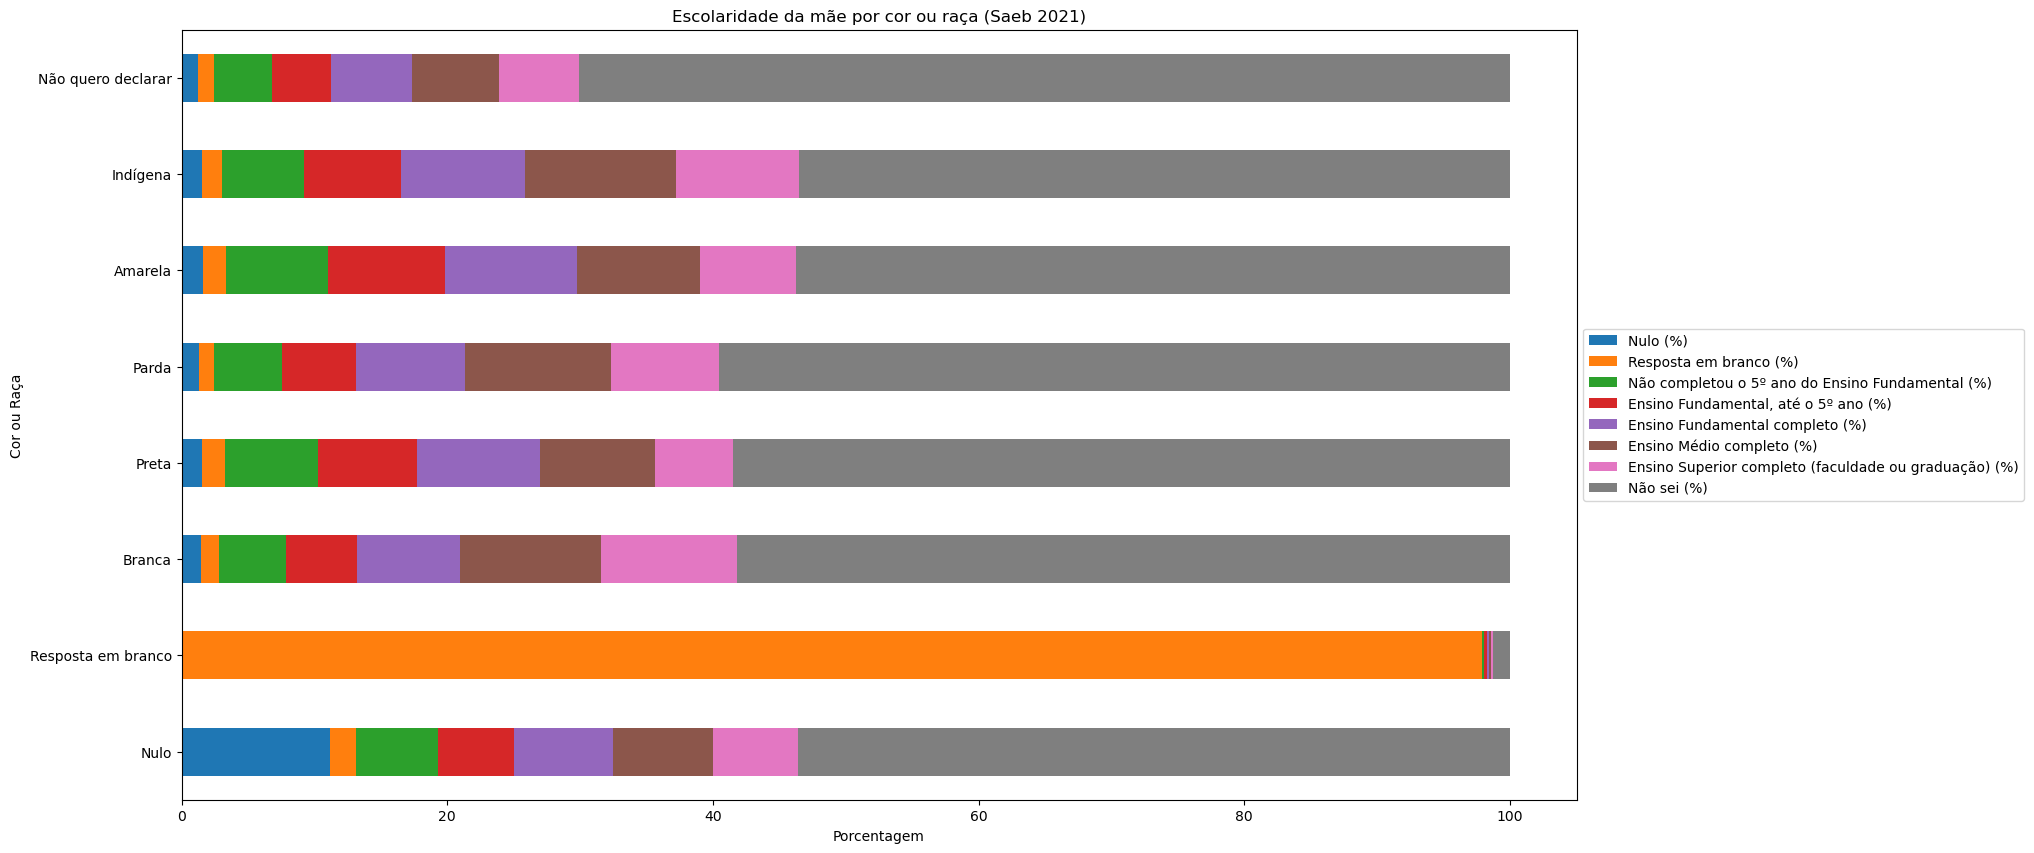

In [24]:
# Criar gráfico de barras empilhadas horizontais
ax = saeb2021_5EF_escolaridade_mae_porcentagem.plot(kind='barh', stacked=True, figsize=(18, 10))

# Configurar rótulos e título
ax.set_xlabel('Porcentagem')
ax.set_ylabel('Cor ou Raça')
ax.set_title('Escolaridade da mãe por cor ou raça (Saeb 2021)')

# Adicionar a legenda fora do gráfico
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Salvar imagem:
plt.savefig('5EF_Escolaridade mae.png', bbox_inches='tight')


# Exibir o gráfico
plt.show()

In [25]:
saeb2021_5EF_escolaridade_mae_porcentagem

,Nulo (%),Resposta em branco (%),Não completou o 5º ano do Ensino Fundamental (%),"Ensino Fundamental, até o 5º ano (%)",Ensino Fundamental completo (%),Ensino Médio completo (%),Ensino Superior completo (faculdade ou graduação) (%),Não sei (%)
Cor ou Raça,,,,,,,,
Nulo,11.15,2.02,6.10,5.78,7.40,7.52,6.41,53.63
Resposta em branco,0.04,97.88,0.16,0.16,0.16,0.17,0.14,1.29
Branca,1.49,1.34,5.01,5.35,7.75,10.61,10.30,58.14
Preta,1.53,1.73,6.99,7.44,9.27,8.65,5.90,58.48
Parda,1.31,1.15,5.10,5.56,8.19,10.99,8.19,59.51
Amarela,1.63,1.74,7.62,8.87,9.90,9.25,7.28,53.72
Indígena,1.56,1.46,6.17,7.30,9.38,11.35,9.24,53.54
Não quero declarar,1.26,1.15,4.40,4.44,6.09,6.53,6.05,70.08


### TX_RESP_Q08: Qual é a maior escolaridade de seu pai (ou homem responsável por você)?

In [26]:
saeb2021_5EF_escolaridade_pai = pd.crosstab(saeb2021_5EF['TX_RESP_Q04'], saeb2021_5EF['TX_RESP_Q08'])

saeb2021_5EF_escolaridade_pai

TX_RESP_Q08,*,.,A,B,C,D,E,F
TX_RESP_Q04,,,,,,,,
*,1210,355,763,738,897,921,772,8329
.,173,630048,854,842,910,933,690,8759
A,4854,9425,29231,30190,39501,52055,45192,377171
B,1956,5227,14756,14964,18148,17339,10977,153932
C,5560,11010,40433,40601,53075,67365,47926,524702
D,537,1081,3446,3986,4483,4240,3138,31211
E,337,641,2197,2193,2751,3269,2677,20450
F,1308,2819,8198,7660,9723,10653,9234,145168


In [27]:
# Renomear as colunas:
saeb2021_5EF_escolaridade_pai.columns = ['Nulo',
                                         'Resposta em branco',
                                         'Não completou o 5º ano do Ensino Fundamental',
                                         'Ensino Fundamental, até o 5º ano',
                                         'Ensino Fundamental completo',
                                         'Ensino Médio completo',
                                         'Ensino Superior completo (faculdade ou graduação)',
                                         'Não sei']

In [28]:
# Modificando os nomes das colunas:
saeb2021_5EF_escolaridade_pai = saeb2021_5EF_escolaridade_pai.rename_axis(index='Cor ou Raça')

In [29]:
# Renomear os índices:
saeb2021_5EF_escolaridade_pai = saeb2021_5EF_escolaridade_pai.rename({'*': 'Nulo',
                                                                      '.': 'Resposta em branco',
                                                                      'A': 'Branca',
                                                                      'B': 'Preta',
                                                                      'C': 'Parda',
                                                                      'D': 'Amarela',
                                                                      'E': 'Indígena',
                                                                      'F': 'Não quero declarar'})

In [30]:
# Calcule as porcentagens em relação ao somatório das linhas:
saeb2021_5EF_escolaridade_pai_porcentagem = saeb2021_5EF_escolaridade_pai.div(saeb2021_5EF_escolaridade_pai.sum(axis=1), axis=0) * 100

# Adicione as novas colunas ao DataFrame original:
saeb2021_5EF_escolaridade_pai = pd.concat([saeb2021_5EF_escolaridade_pai, saeb2021_5EF_escolaridade_pai_porcentagem.add_suffix(' (%)')], axis=1)

In [31]:
saeb2021_5EF_escolaridade_pai = saeb2021_5EF_escolaridade_pai.round(2)

#### Visualizações:

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

#Novo Dataframe só com as colunas de % de escolaridade:
# Selecione as colunas desejadas:
columns_to_plot = ['Nulo (%)',
                   'Resposta em branco (%)',
                   'Não completou o 5º ano do Ensino Fundamental (%)',
                   'Ensino Fundamental, até o 5º ano (%)',
                   'Ensino Fundamental completo (%)',
                   'Ensino Médio completo (%)',
                   'Ensino Superior completo (faculdade ou graduação) (%)',
                   'Não sei (%)']

# Crie um novo DataFrame apenas com as colunas desejadas
saeb2021_5EF_escolaridade_pai_porcentagem = saeb2021_5EF_escolaridade_pai[columns_to_plot]

In [33]:
saeb2021_5EF_escolaridade_pai_porcentagem = saeb2021_5EF_escolaridade_pai_porcentagem.round(2)

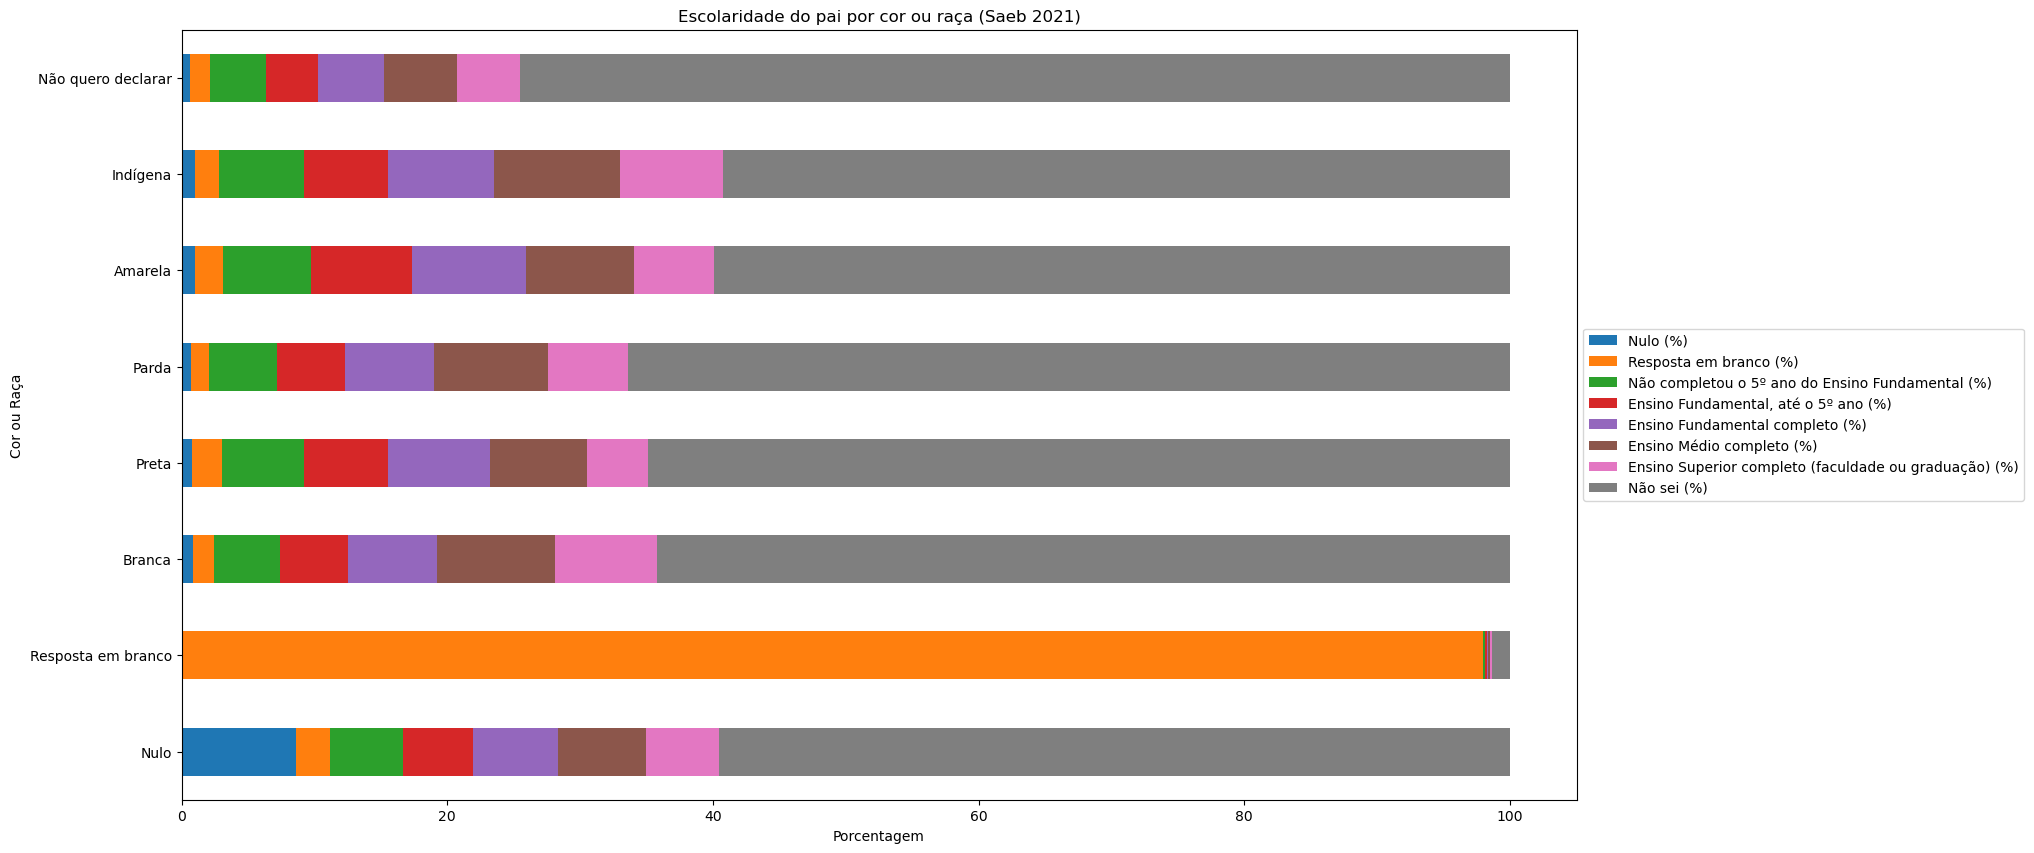

In [34]:
# Criar gráfico de barras empilhadas horizontais
ax = saeb2021_5EF_escolaridade_pai_porcentagem.plot(kind='barh', stacked=True, figsize=(18, 10))

# Configurar rótulos e título
ax.set_xlabel('Porcentagem')
ax.set_ylabel('Cor ou Raça')
ax.set_title('Escolaridade do pai por cor ou raça (Saeb 2021)')

# Adicionar a legenda fora do gráfico
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Salvar imagem:
plt.savefig('5EF_Escolaridade pai.png', bbox_inches='tight')


# Exibir o gráfico
plt.show()

In [35]:
saeb2021_5EF_escolaridade_pai_porcentagem

,Nulo (%),Resposta em branco (%),Não completou o 5º ano do Ensino Fundamental (%),"Ensino Fundamental, até o 5º ano (%)",Ensino Fundamental completo (%),Ensino Médio completo (%),Ensino Superior completo (faculdade ou graduação) (%),Não sei (%)
Cor ou Raça,,,,,,,,
Nulo,8.65,2.54,5.46,5.28,6.41,6.59,5.52,59.56
Resposta em branco,0.03,97.95,0.13,0.13,0.14,0.15,0.11,1.36
Branca,0.83,1.60,4.97,5.14,6.72,8.86,7.69,64.19
Preta,0.82,2.20,6.22,6.31,7.65,7.31,4.63,64.87
Parda,0.70,1.39,5.11,5.13,6.71,8.52,6.06,66.36
Amarela,1.03,2.07,6.61,7.65,8.60,8.13,6.02,59.88
Indígena,0.98,1.86,6.37,6.35,7.97,9.47,7.76,59.25
Não quero declarar,0.67,1.45,4.21,3.93,4.99,5.47,4.74,74.54


### TX_RESP_Q09c: Com que frequência seus pais ou responsáveis costumam: - Incentivar você a estudar.

In [36]:
saeb2021_5EF_incentivo_estudo = pd.crosstab(saeb2021_5EF['TX_RESP_Q04'], saeb2021_5EF['TX_RESP_Q09c'])

saeb2021_5EF_incentivo_estudo

TX_RESP_Q09c,*,.,A,B,C
TX_RESP_Q04,,,,,
*,728,1640,943,1817,8857
.,1295,609648,2721,5561,23984
A,8044,41147,26175,74943,437310
B,5519,25217,13364,30793,162406
C,10721,50307,32515,96928,600201
D,1580,6231,3657,7754,32900
E,760,3219,1951,4662,23923
F,3421,16871,11875,28112,134484


In [37]:
# Modificando os nomes das colunas:
saeb2021_5EF_incentivo_estudo = saeb2021_5EF_incentivo_estudo.rename_axis(index='Cor ou Raça')

In [38]:
# Renomear as colunas:
saeb2021_5EF_incentivo_estudo.columns = ['Nulo',
                                         'Resposta em branco',
                                         'Nunca ou quase nunca',
                                         'De vez em quando',
                                         'Sempre ou quase sempre']

In [39]:
# Renomear os índices:
saeb2021_5EF_incentivo_estudo = saeb2021_5EF_incentivo_estudo.rename({'*': 'Nulo',
                                                                      '.': 'Resposta em branco',
                                                                      'A': 'Branca',
                                                                      'B': 'Preta',
                                                                      'C': 'Parda',
                                                                      'D': 'Amarela',
                                                                      'E': 'Indígena',
                                                                      'F': 'Não quero declarar'})

In [40]:
# Calcule as porcentagens em relação ao somatório das linhas:
saeb2021_5EF_incentivo_estudo_porcentagem = saeb2021_5EF_incentivo_estudo.div(saeb2021_5EF_incentivo_estudo.sum(axis=1), axis=0) * 100

# Adicione as novas colunas ao DataFrame original:
saeb2021_5EF_incentivo_estudo = pd.concat([saeb2021_5EF_incentivo_estudo, saeb2021_5EF_incentivo_estudo_porcentagem.add_suffix(' (%)')], axis=1)

In [41]:
saeb2021_5EF_incentivo_estudo = saeb2021_5EF_incentivo_estudo.round(2)

**Visualizações:**

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

#Novo Dataframe só com as colunas de % de escolaridade:
# Selecione as colunas desejadas:
columns_to_plot = ['Nulo (%)',
                   'Resposta em branco (%)',
                   'Nunca ou quase nunca (%)',
                   'De vez em quando (%)',
                   'Sempre ou quase sempre (%)']

# Crie um novo DataFrame apenas com as colunas desejadas
saeb2021_5EF_incentivo_estudo_porcentagem = saeb2021_5EF_incentivo_estudo[columns_to_plot]

In [43]:
saeb2021_5EF_incentivo_estudo_porcentagem = saeb2021_5EF_incentivo_estudo_porcentagem.round(2)

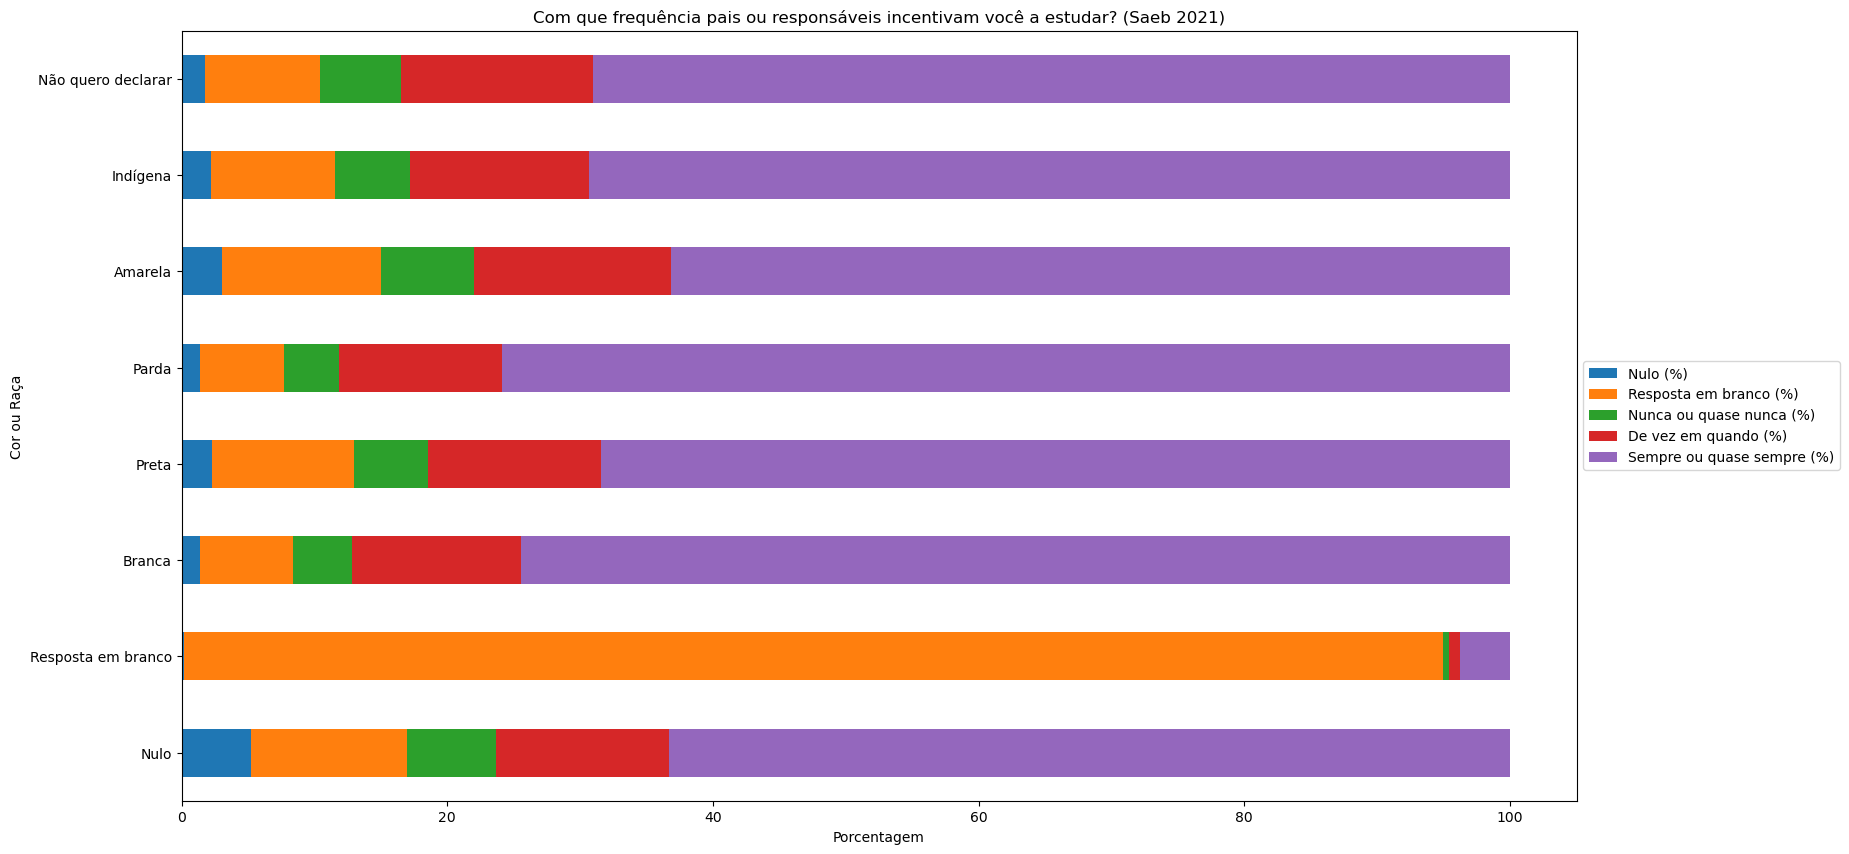

In [44]:
# Criar gráfico de barras empilhadas horizontais
ax = saeb2021_5EF_incentivo_estudo_porcentagem.plot(kind='barh', stacked=True, figsize=(18, 10))

# Configurar rótulos e título
ax.set_xlabel('Porcentagem')
ax.set_ylabel('Cor ou Raça')
ax.set_title('Com que frequência pais ou responsáveis incentivam você a estudar? (Saeb 2021)')

# Adicionar a legenda fora do gráfico
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Salvar imagem:
plt.savefig('5EF_Incentivo a estudar.png', bbox_inches='tight')


# Exibir o gráfico
plt.show()

In [45]:
saeb2021_5EF_incentivo_estudo_porcentagem

,Nulo (%),Resposta em branco (%),Nunca ou quase nunca (%),De vez em quando (%),Sempre ou quase sempre (%)
Cor ou Raça,,,,,
Nulo,5.21,11.73,6.74,12.99,63.33
Resposta em branco,0.20,94.78,0.42,0.86,3.73
Branca,1.37,7.00,4.45,12.75,74.42
Preta,2.33,10.63,5.63,12.98,68.44
Parda,1.36,6.36,4.11,12.26,75.91
Amarela,3.03,11.95,7.02,14.88,63.12
Indígena,2.20,9.33,5.65,13.51,69.31
Não quero declarar,1.76,8.66,6.10,14.43,69.05
